# OverSampling followed by UnderSampling techniques....

#### friedman_aligned_ranks_test for ranking the classifiers

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import itertools as it

def friedman_aligned_ranks_test(*args):
    k = len(args)
    if k < 2: raise ValueError('Less than 2 levels')
    n = len(args[0])
    if len(set([len(v) for v in args])) != 1: raise ValueError('Unequal number of samples')

    aligned_observations = []
    for i in range(n):
        loc = sp.mean([col[i] for col in args])
        aligned_observations.extend([col[i] - loc for col in args])
        
    aligned_observations_sort = sorted(aligned_observations)
    
    aligned_ranks = []
    for i in range(n):
        row = []
        for j in range(k):
            v = aligned_observations[i*k+j]
            row.append(aligned_observations_sort.index(v) + 1 + (aligned_observations_sort.count(v)-1)/2.)
        aligned_ranks.append(row)

    rankings_avg = [sp.mean([case[j] for case in aligned_ranks]) for j in range(k)]
    rankings_cmp = [r/sp.sqrt(k*(n*k+1)/6.) for r in rankings_avg]

    r_i = [np.sum(case) for case in aligned_ranks]
    r_j = [np.sum([case[j] for case in aligned_ranks]) for j in range(k)]
    T = (k-1) * (sp.sum(v**2 for v in r_j) - (k*n**2/4.) * (k*n+1)**2) / float(((k*n*(k*n+1)*(2*k*n+1))/6.) - (1./float(k))*sp.sum(v**2 for v in r_i))

    p_value = 1 - st.chi2.cdf(T, k-1)

    return T, p_value, rankings_avg, rankings_cmp

In [2]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")

In [3]:
cc_data=pd.read_csv('creditcard.csv')
cc_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc_data.shape

(284807, 31)

In [5]:
X=cc_data.drop(['Class'],axis=1)
y=cc_data['Class']

In [6]:
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

284315
492


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
X=scaler.transform(X)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [9]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

In [10]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1')
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators =100,random_state=11)
import xgboost
from xgboost import XGBClassifier
xg=XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha =0.2)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
from sklearn import tree
clf =  tree.DecisionTreeClassifier()

In [12]:
classifier = {'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc,
            'XGBoost':xg,'KNeighbors':knn,'SVM':svc,'DecisionTreeClassifier':clf}
classifie=sorted(classifier.keys())
print(classifie)
print(type(classifie))

['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 'RandomForest', 'SVM', 'XGBoost', 'logistic']
<class 'list'>


In [13]:
  #defining a dictionary of classifier
classifier={'Adaboost': abc,'DecisionTreeClassifier':clf,'GaussianNB': gnb,'KNeighbors':knn,'MultinomialNB': mnb,
            'RandomForest': rfc,'SVM':svc,'XGBoost':xg,'logistic': lr}
Classifi=['Adaboost', 'DecisionTree', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 'RandomForest', 'SVM'
          , 'XGBoost', 'logistic']

df=pd.DataFrame(Classifi,columns=['Classiifier'])
df
# print(classifier)

,Classiifier
0,Adaboost
1,DecisionTree
2,GaussianNB
3,KNeighbors
4,MultinomialNB
5,RandomForest
6,SVM
7,XGBoost
8,logistic


## 1. SMOTETomek
#### |Smote+ Tomek Links |

In [35]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
smt

SMOTETomek(random_state=None, ratio='auto', sampling_strategy='auto',
      smote=None, tomek=None)

In [36]:
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

284315
492


In [37]:
X_smt, y_smt = smt.fit_sample(X, y)

In [38]:
print(np.count_nonzero(y_smt == 0))
print(np.count_nonzero(y_smt == 1))
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=42)

284315
284315


<Figure size 2160x1800 with 0 Axes>

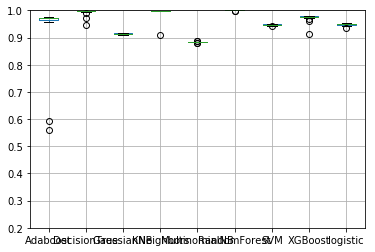

,Adaboost,DecisionTree,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,0.561277,0.990662,0.908573,0.911132,0.880243,0.997705,0.941387,0.959800,0.936639
1,0.971960,0.998760,0.912371,0.998628,0.879372,0.999868,0.945476,0.978818,0.946030
2,0.963941,0.997784,0.916223,0.998127,0.884120,0.999921,0.949380,0.972672,0.950066
3,0.958481,0.996940,0.912398,0.996861,0.883118,0.999815,0.947903,0.966631,0.948958
4,0.970852,0.995226,0.913189,0.997758,0.883039,0.999974,0.948589,0.976840,0.949908
5,0.972961,0.971642,0.916271,0.998760,0.883534,1.000000,0.949773,0.975757,0.952649
6,0.975282,0.998496,0.916799,0.998523,0.885723,0.999868,0.951461,0.979345,0.952886
7,0.974227,0.997758,0.912683,0.997257,0.882057,0.999842,0.947293,0.978342,0.948322
8,0.968635,0.996623,0.913422,0.996914,0.883507,0.999763,0.946186,0.976179,0.945684
9,0.973911,0.998364,0.912525,0.999420,0.883033,0.999947,0.942440,0.977604,0.942703


In [39]:
#predict and storing score of each classifier
parameter = []
res=[]
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in sorted (classifier.items()):
    kfold = StratifiedKFold(n_splits=15, random_state=0)
    results = cross_val_score(c,X_smt, y_smt, cv=kfold)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[results.mean()]))
    result=pd.DataFrame(results)
#     print(result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
# print(res)
res.columns = ['Adaboost', 'DecisionTree', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 
               'RandomForest', 'SVM', 'XGBoost', 'logistic']

boxplot = res.boxplot(grid=True,figsize=(25,15))
boxplot.set_ylim([0.2,1.0])
plt.show()
res

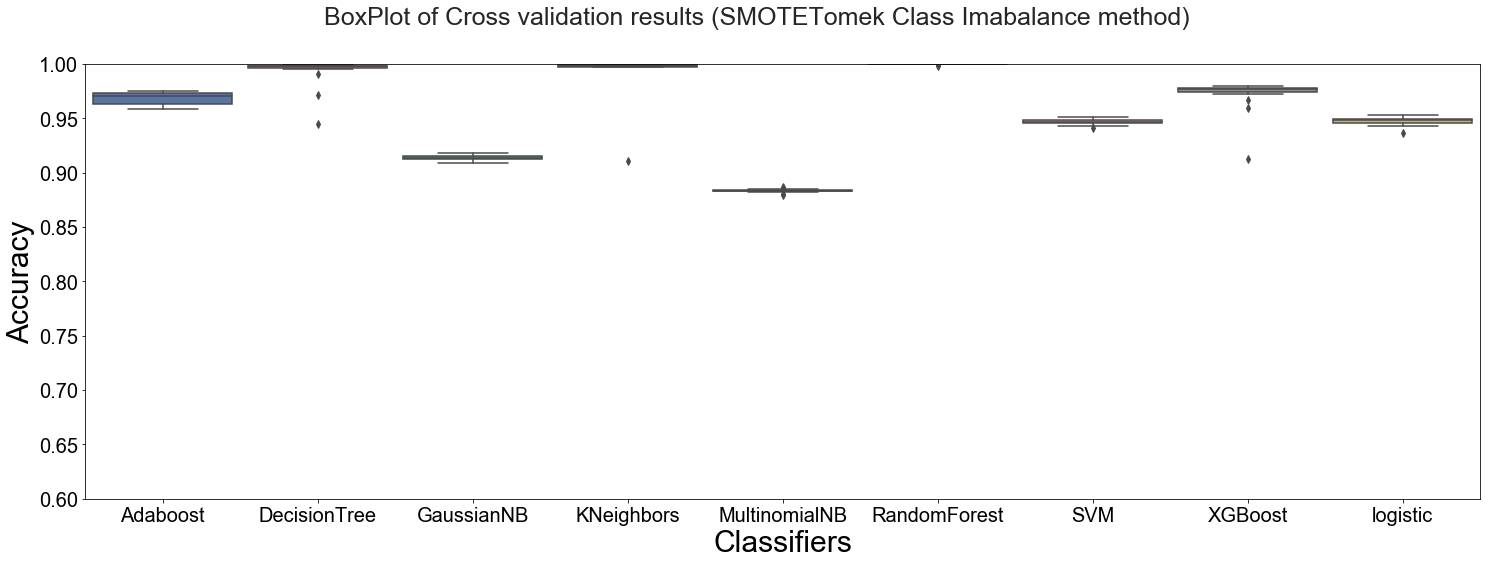

In [40]:
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.6,1.0])
fig.suptitle('BoxPlot of Cross validation results (SMOTETomek Class Imabalance method) ', fontsize=25)
plt.ylabel('Accuracy',fontsize=30)
plt.xlabel('Classifiers',fontsize=30)
plt.tick_params(axis='both', which='major', colors='black', labelsize=20)
plt.savefig('./SMOTETomek_cross_validation.png',dpi=300)
plt.show()

In [41]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
Adaboost,0.917759
DecisionTreeClassifier,0.991981
GaussianNB,0.913596
KNeighbors,0.992327
MultinomialNB,0.883355
RandomForest,0.999703
SVM,0.946756
XGBoost,0.970876
logistic,0.947495


In [42]:
p=friedman_aligned_ranks_test(res['Adaboost'],res['DecisionTree'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(97.40213066881023, 0.0, [58.53333333333333, 101.33333333333333, 27.333333333333332, 103.66666666666667, 11.733333333333333, 120.4, 53.333333333333336, 81.66666666666667, 54.0], [4.098153045921975, 7.094752425741915, 1.91371611483828, 7.258118435545184, 0.8214976492964323, 8.429686105848619, 3.7340802240746926, 5.717810343114373, 3.780756226875626])


In [43]:
def predict(clf,X_test):
    return clf.predict(X_test)


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=11)
 Total time in : 
 266.0868639945984
Confusion_matrix 
 [[83788  1361]
 [ 2760 82680]]
Precision: 0.9838055234944848
Recall: 0.9676966292134831
f1_score: 0.9756845900130398
AUC: 0.976

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
 Total time in : 
 34.41319799423218
Confusion_matrix 
 [[84912   237]
 [  108 85332]]
Precision: 0.997230305367598
Recall: 0.9987359550561797
f1_score: 0.9979825623212812
AUC: 0.998

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.6706116199493408
Confusion_matrix 


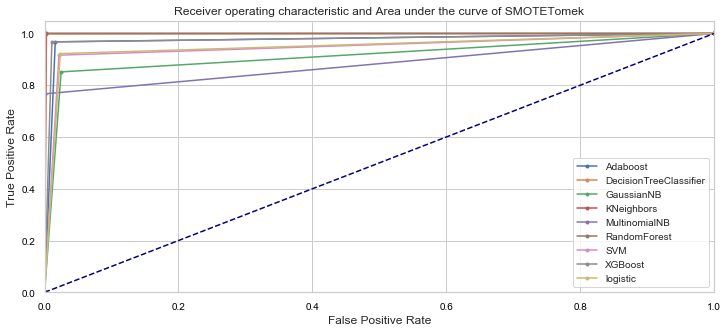

In [44]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred), metrics.f1_score(y_test,pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=print("Precision:",metrics.precision_score(y_test, pred))
    recall=print("Recall:",metrics.recall_score(y_test, pred))
    f1_score= print("f1_score:",metrics.f1_score(y_test,pred))
#     ROC AND AUC CURVE
#     
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    # plot no skill
    plt.plot(fpr, tpr, marker='.',label=n)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve of SMOTETomek',fontsize=12)
plt.legend(loc=0,fontsize='small')
plt.tick_params(axis='both', which='major', colors='black', labelsize=10)
    # show the plot
plt.savefig('./SMOTETomek_Roc_Auc.png',dpi=300)
plt.show()

In [45]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall','f1_score'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,f1_score,Accuracy (%)
Adaboost,0.975843,0.983806,0.967697,0.975685,97.584252
DecisionTreeClassifier,0.997978,0.997230,0.998736,0.997983,99.797760
GaussianNB,0.913277,0.971842,0.851522,0.907712,91.327694
KNeighbors,0.998898,0.997804,1.000000,0.998901,99.889794
MultinomialNB,0.882917,0.999481,0.766632,0.867707,88.291742
RandomForest,0.999924,0.999848,1.000000,0.999924,99.992379
SVM,0.947177,0.977162,0.915941,0.945562,94.717713
XGBoost,0.978111,0.988906,0.967147,0.977905,97.811113
logistic,0.949270,0.975267,0.922097,0.947937,94.926988


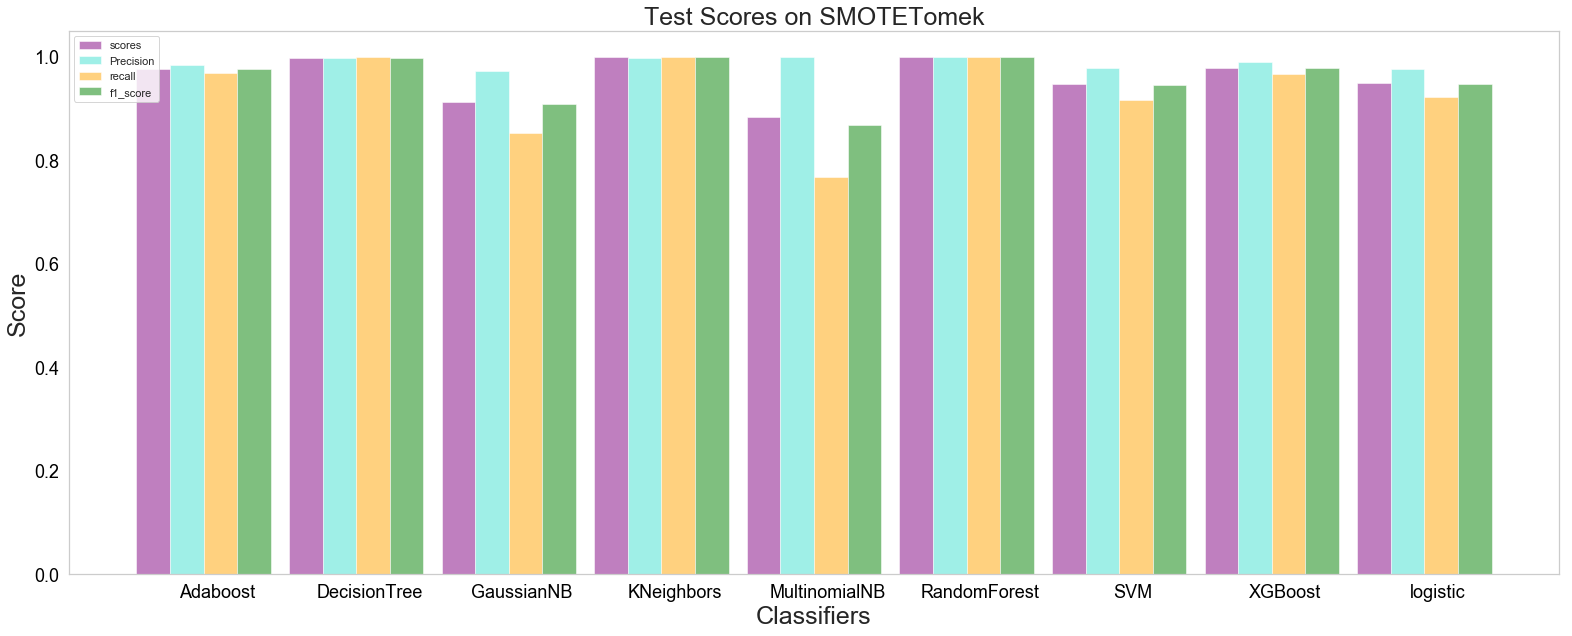

In [46]:
pos = list(range(len(df['Classiifier']))) 
width = 0.22 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(22,9)) 
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='purple',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 
plt.bar([p + width*3 for p in pos],score_df['f1_score'],width,alpha=0.5, color='green',label=score_df['f1_score']) 
ax.set_ylabel('Score',fontsize=25)
ax.set_xlabel('Classifiers',fontsize=25)
ax.set_title('Test Scores on SMOTETomek',fontsize=25)
ax.set_xticks([p + 1.9 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
plt.tick_params(axis='both', which='major', colors='black', labelsize=18)
plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall','f1_score'], loc='upper left')
plt.grid()
plt.savefig('./SMOTETomek_graph1.png',dpi=300)
plt.show()

## 2. Smoteenn 
### |Smote+ ENN (Edited nearest neighbour)|

In [14]:
from imblearn.combine import SMOTEENN # doctest: +NORMALIZE_WHITESPACE
sme = SMOTEENN(random_state=42)
sme

SMOTEENN(enn=None, random_state=42, ratio=None, sampling_strategy='auto',
     smote=None)

In [15]:
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

284315
492


In [16]:
X_smo, y_smo = sme.fit_resample(X, y)

In [17]:
print(X_smo.shape)
print(np.count_nonzero(y_smo == 0))
print(np.count_nonzero(y_smo == 1))
X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=0.3, random_state=42)

(568189, 30)
283874
284315


In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(397732, 30)
(170457, 30)
(397732,)
(170457,)


C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

<Figure size 2160x1800 with 0 Axes>

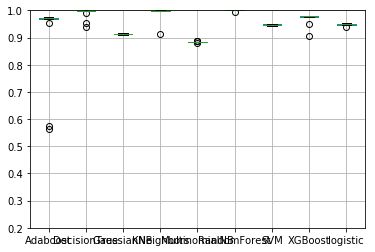

,Adaboost,DecisionTree,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,0.563173,0.992054,0.910692,0.911352,0.883844,0.995222,0.942080,0.949551,0.937909
1,0.971727,0.998099,0.914388,0.998997,0.880016,0.999921,0.945380,0.977508,0.946225
2,0.970037,0.998099,0.914124,0.998944,0.883765,1.000000,0.948706,0.977587,0.949340
3,0.954778,0.998126,0.912117,0.997914,0.882418,1.000000,0.947439,0.975924,0.949129
4,0.969615,0.997677,0.913728,0.998733,0.883131,0.999974,0.950977,0.978722,0.951822
5,0.972650,0.953431,0.915098,0.999261,0.883128,1.000000,0.951213,0.975580,0.952559
6,0.973442,0.998073,0.914332,0.999314,0.881940,1.000000,0.949207,0.978352,0.951371
7,0.971303,0.997914,0.911032,0.998046,0.881808,0.999921,0.947411,0.979276,0.948309
8,0.970168,0.998152,0.913831,0.997439,0.884131,0.999947,0.945273,0.975844,0.944613
9,0.973706,0.998073,0.914200,0.999683,0.886111,0.999789,0.945669,0.977560,0.945696


In [19]:
parameter = []
res=[]
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in sorted (classifier.items()):
    kfold = StratifiedKFold(n_splits=15, random_state=0)
    results = cross_val_score(c,X_smo, y_smo, cv=kfold)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[results.mean()]))
    result=pd.DataFrame(results)
#     print(result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
# print(res)
res.columns = ['Adaboost', 'DecisionTree', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 
               'RandomForest', 'SVM', 'XGBoost', 'logistic']

boxplot = res.boxplot(grid=True,figsize=(25,15))
boxplot.set_ylim([0.2,1.0])
plt.show()
res

In [20]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
Adaboost,0.917233
DecisionTreeClassifier,0.990704
GaussianNB,0.913302
KNeighbors,0.992980
MultinomialNB,0.883609
RandomForest,0.999625
SVM,0.946757
XGBoost,0.970960
logistic,0.947590


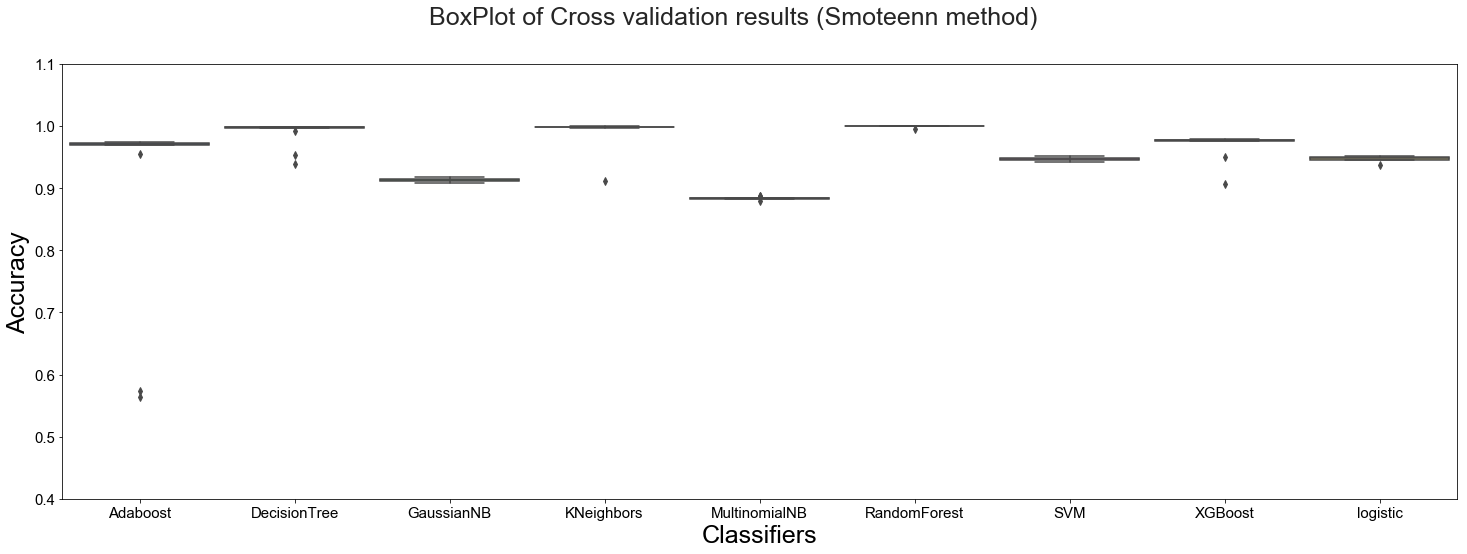

In [21]:
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.4,1.1])
fig.suptitle('BoxPlot of Cross validation results (Smoteenn method) ', fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel('Classifiers',fontsize=25)
plt.tick_params(axis='both', which='major', colors='black', labelsize=15)
plt.savefig('./Smoteenn_cross_validation.png',dpi=300)
plt.show()

In [22]:
p=friedman_aligned_ranks_test(res['Adaboost'],res['DecisionTree'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(95.9847507211808, 0.0, [57.6, 97.66666666666667, 28.0, 106.6, 12.0, 119.33333333333333, 52.93333333333333, 82.8, 55.06666666666667], [4.0328066420006685, 6.838034410336781, 1.9603921176392136, 7.463492847869292, 0.8401680504168059, 8.355004501367125, 3.7060746223941323, 5.79715954787596, 3.8554378313571203])


In [23]:
def predict(clf,X_test):
    return clf.predict(X_test)


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=11)
 Total time in : 
 300.7209475040436
Confusion_matrix 
 [[83690  1344]
 [ 2504 82919]]
Precision: 0.9840499388818342
Recall: 0.9706870514966696
f1_score: 0.9773228197965654
AUC: 0.977

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
 Total time in : 
 36.13220477104187
Confusion_matrix 
 [[84773   261]
 [  126 85297]]
Precision: 0.9969494378082704
Recall: 0.9985249874155673
f1_score: 0.9977365906153315
AUC: 0.998

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.7235813140869141
Confusion_matrix 

C:\Users\bccuser01\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 Classifier is: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
 Total time in : 
 1588.4745688438416
Confusion_matrix 
 [[83011  2023]
 [ 6671 78752]]
Precision: 0.9749551222531724
Recall: 0.9219062781686431
f1_score: 0.9476889011901466
AUC: 0.949


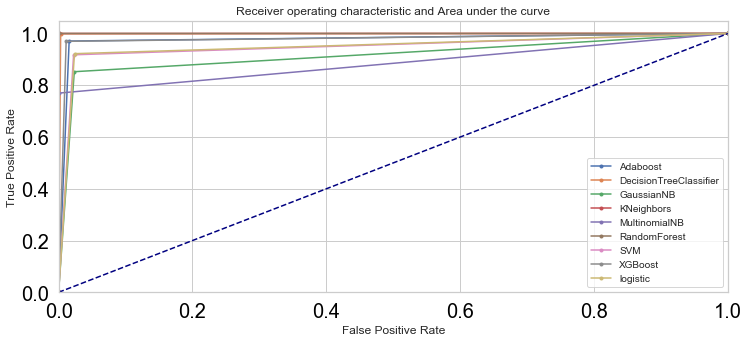

In [24]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred), metrics.f1_score(y_test,pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=print("Precision:",metrics.precision_score(y_test, pred))
    recall=print("Recall:",metrics.recall_score(y_test, pred))
    f1_score= print("f1_score:",metrics.f1_score(y_test,pred))
#     ROC AND AUC CURVE
#     
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    # plot no skill
    plt.plot(fpr, tpr, marker='.',label=n)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend(loc=0,fontsize='small')
    # show the plot
    
plt.tick_params(axis='both', which='major', colors='black', labelsize=20)
plt.savefig('./Smoteenn_graph2.png',dpi=300)
plt.show()

In [25]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall','f1_score'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,f1_score,Accuracy (%)
Adaboost,0.977425,0.984050,0.970687,0.977323,97.742539
DecisionTreeClassifier,0.997730,0.996949,0.998525,0.997737,99.772963
GaussianNB,0.914225,0.973326,0.852194,0.908741,91.422470
KNeighbors,0.999525,0.999053,1.000000,0.999526,99.952481
MultinomialNB,0.884352,0.999696,0.769465,0.869600,88.435207
RandomForest,0.999906,0.999813,1.000000,0.999906,99.990613
SVM,0.947441,0.976245,0.917446,0.945933,94.744129
XGBoost,0.979068,0.988517,0.969493,0.978913,97.906803
logistic,0.948996,0.974955,0.921906,0.947689,94.899593


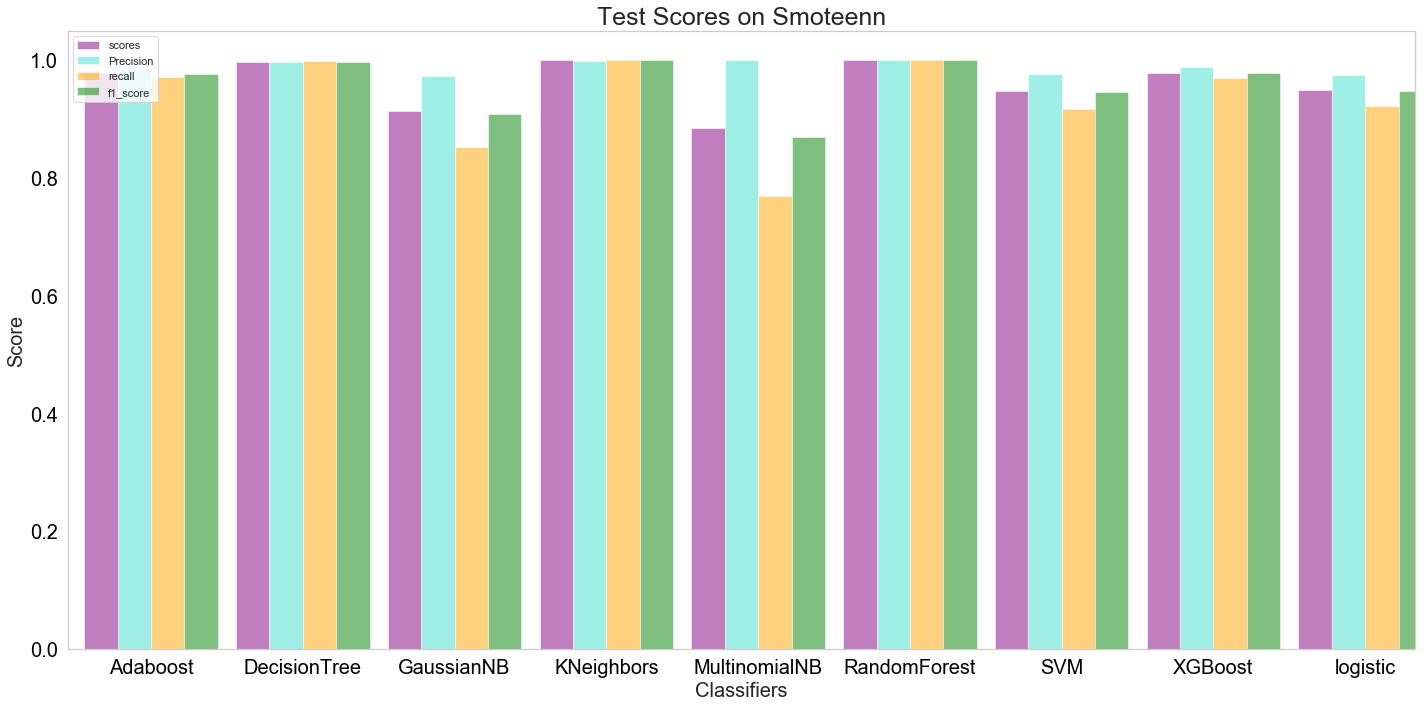

In [26]:
pos = list(range(len(df['Classiifier']))) 
width = 0.22 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,10)) 
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='purple',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 
plt.bar([p + width*3 for p in pos],score_df['f1_score'],width,alpha=0.5, color='green',label=score_df['f1_score']) 
ax.set_ylabel('Score',fontsize=20)
ax.set_xlabel('Classifiers',fontsize=20)
ax.set_title('Test Scores on Smoteenn',fontsize=25)
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
plt.xlim(min(pos)-width, max(pos)+width*3)

plt.tick_params(axis='both', which='major', colors='black', labelsize=20)
plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall','f1_score'], loc='upper left')
plt.grid()
plt.savefig('./Smoteenn_graph1.png')
plt.show()